<a href="https://www.kaggle.com/code/sinderpreet/titanic-challenge?scriptVersionId=166397287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train= pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
#Always inspect the dataset's shape to assess its size and structure efficiently.
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
#To understand the data columns which is necessary to keep or to leave 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Command gives us detailed information about columns 
#It also gives us information that how many missing values are present in DS
#By this command got to know that Cabin column has neary 30% missing values 


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Similary in test file Cabin data is nearly 20% of missing data 
#due to which i decided to remove cabin column

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#To delete the column we have command in pandas called drop
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)


In [8]:
#To check the null values in the dataset (Second Method)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [10]:
#To check the accuracy to replace missing value in Embarked column 
#I checked which destination passengers are going the most 
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
#To replace missing values with S, I used fillna 
train['Embarked'].fillna('S',inplace=True)

/tmp/ipykernel_18/1028955761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [13]:
#To replace the missing value of Fare I used mean function
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


In [14]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [15]:
#To analyse the age column first i checked how many percentage of the data we require.
#Roughly 20% data , I chosen to keep the data since its of large amt 
# We can fill missing value using average, median or more ways 

(177/891)*100

19.865319865319865

In [16]:
#I will take out mean and STD(Standard Deviation) for column Age
#I will generate 177 random ages group by mean and STD
np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean() + train['Age'].std(),177)

array([35, 28, 42, 29, 36, 36, 42, 15, 43, 25, 27, 43, 31, 43, 41, 34, 36,
       28, 33, 42, 38, 27, 33, 26, 16, 26, 19, 26, 26, 17, 33, 37, 30, 23,
       33, 39, 21, 17, 20, 17, 41, 42, 16, 29, 40, 38, 18, 37, 38, 32, 15,
       41, 31, 17, 18, 24, 16, 38, 28, 33, 31, 43, 26, 32, 16, 26, 24, 21,
       17, 28, 27, 17, 36, 33, 31, 24, 25, 37, 24, 19, 15, 36, 28, 37, 40,
       30, 32, 19, 30, 27, 28, 32, 26, 20, 33, 15, 42, 22, 21, 18, 43, 20,
       36, 32, 25, 16, 39, 27, 33, 40, 35, 29, 31, 16, 32, 31, 33, 24, 27,
       23, 15, 38, 23, 30, 31, 30, 17, 26, 43, 25, 26, 30, 36, 36, 42, 37,
       38, 30, 40, 17, 36, 21, 24, 27, 42, 22, 33, 26, 17, 18, 32, 36, 41,
       24, 25, 24, 31, 29, 37, 37, 28, 31, 23, 25, 33, 27, 26, 28, 41, 43,
       23, 40, 17, 26, 30, 41, 30])

In [17]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean() + train['Age'].std(),177)

In [18]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean() + test['Age'].std(),86)

In [19]:
#Now we need to replace the missing values with random array 
# Calculate the mean age (or use any other appropriate single value)
train_age = train['Age'].mean()

# Use this mean value to fill all NaN values in the 'Age' column
train.loc[train['Age'].isnull(), 'Age'] = train_age


In [20]:
test_age = test['Age'].mean()

# Use this mean value to fill all NaN values in the 'Age' column
test.loc[test['Age'].isnull(), 'Age'] = test_age


In [21]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
#EDA 

# We are checking step by step which column is necessay to keep 
#With this function we checked which class has high percentage of surviving

train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
#Similarly checked the percentage for Sex column
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [24]:
#Similarly checked the percentage for Embarked column
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [25]:
import seaborn as sns

/tmp/ipykernel_18/754718219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/754718219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for his

<Axes: xlabel='Age', ylabel='Density'>

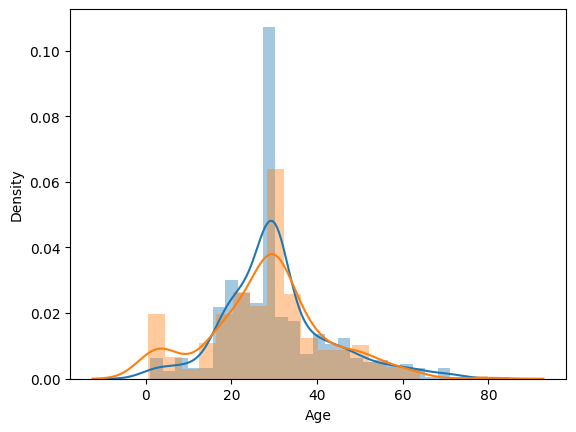

In [26]:
#creating graph to understand which age group survived the most
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


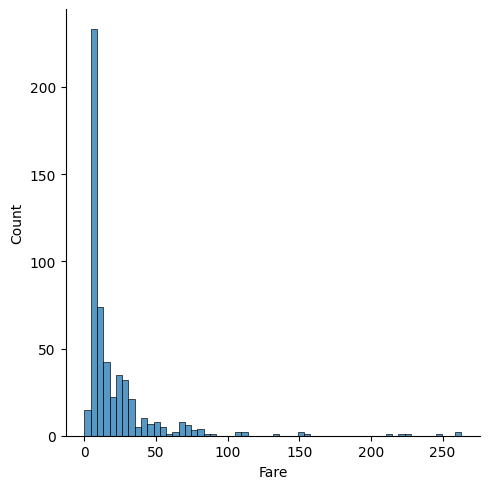

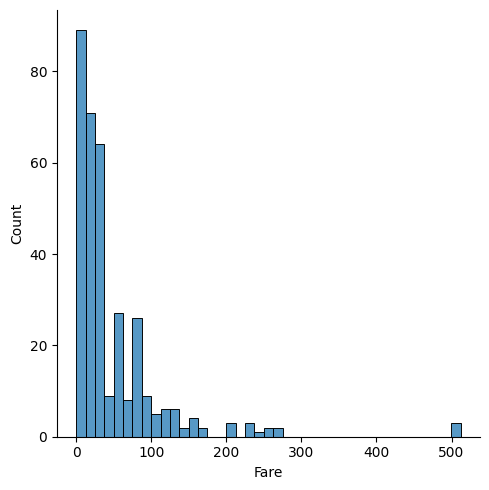

In [27]:
sns.displot(train['Fare'][train['Survived']==0])
sns.displot(train['Fare'][train['Survived']==1])

In [28]:
train.drop(columns=['Ticket'],inplace = True)
test.drop(columns=['Ticket'],inplace = True)

In [29]:
train['family']=train['SibSp']+ train['Parch'] +1
test['family']=test['SibSp']+ test['Parch'] +1

In [30]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [31]:
#To analyse Family column we need to check the ratio of survival
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [32]:
#Creating a new column called Family_size after comparing family counts
def cal(number):
    if number==1:
       return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [33]:
train['family_size']=train['family'].apply(cal)

In [34]:
test['family_size']=test['family'].apply(cal)

In [35]:
#Dropping unnecessary columns
train.drop(columns=['SibSp','Parch','family'],inplace = True)
test.drop(columns=['SibSp','Parch','family'],inplace = True)

In [36]:
passengerId=test['PassengerId'].values

In [37]:
train.drop(columns=['Name','PassengerId'],inplace = True)
test.drop(columns=['Name','PassengerId'],inplace = True)

In [38]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [39]:
#Now Pclass, Sex, Embarked,family_size are categorical values
#We need to convert it to numercial values in order to make algorithn understand well
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [40]:
train.shape

(891, 10)

In [41]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [42]:
test.shape

(418, 9)

In [43]:
X = train.iloc[:, 1:].values  # Selecting all rows and all columns except the first one for features
y = train.iloc[:, 0].values   



In [44]:
# Now, use train_test_split to split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [46]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred=classifier.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7988826815642458

In [49]:
Xf=test.iloc[:,:].values

In [50]:
y_final=classifier.predict(Xf)

In [51]:
y_final.shape

(418,)

In [52]:
passengerId.shape

(418,)

In [53]:
final= pd.DataFrame()

In [54]:
final

""


In [55]:
final['passengerId']=passengerId
final['survived']=y_final

In [56]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
final.to_csv('submission.csv',index=False)